## IMPORTING LABRARIES

In [396]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt

## Loading and Preprocessing Data

In [397]:
# Charger les données Titanic de Seaborn
data = sns.load_dataset('titanic')
data = data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']].dropna()
data

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


## Analysing Data

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   embarked  712 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>, <Axes: >]], dtype=object)

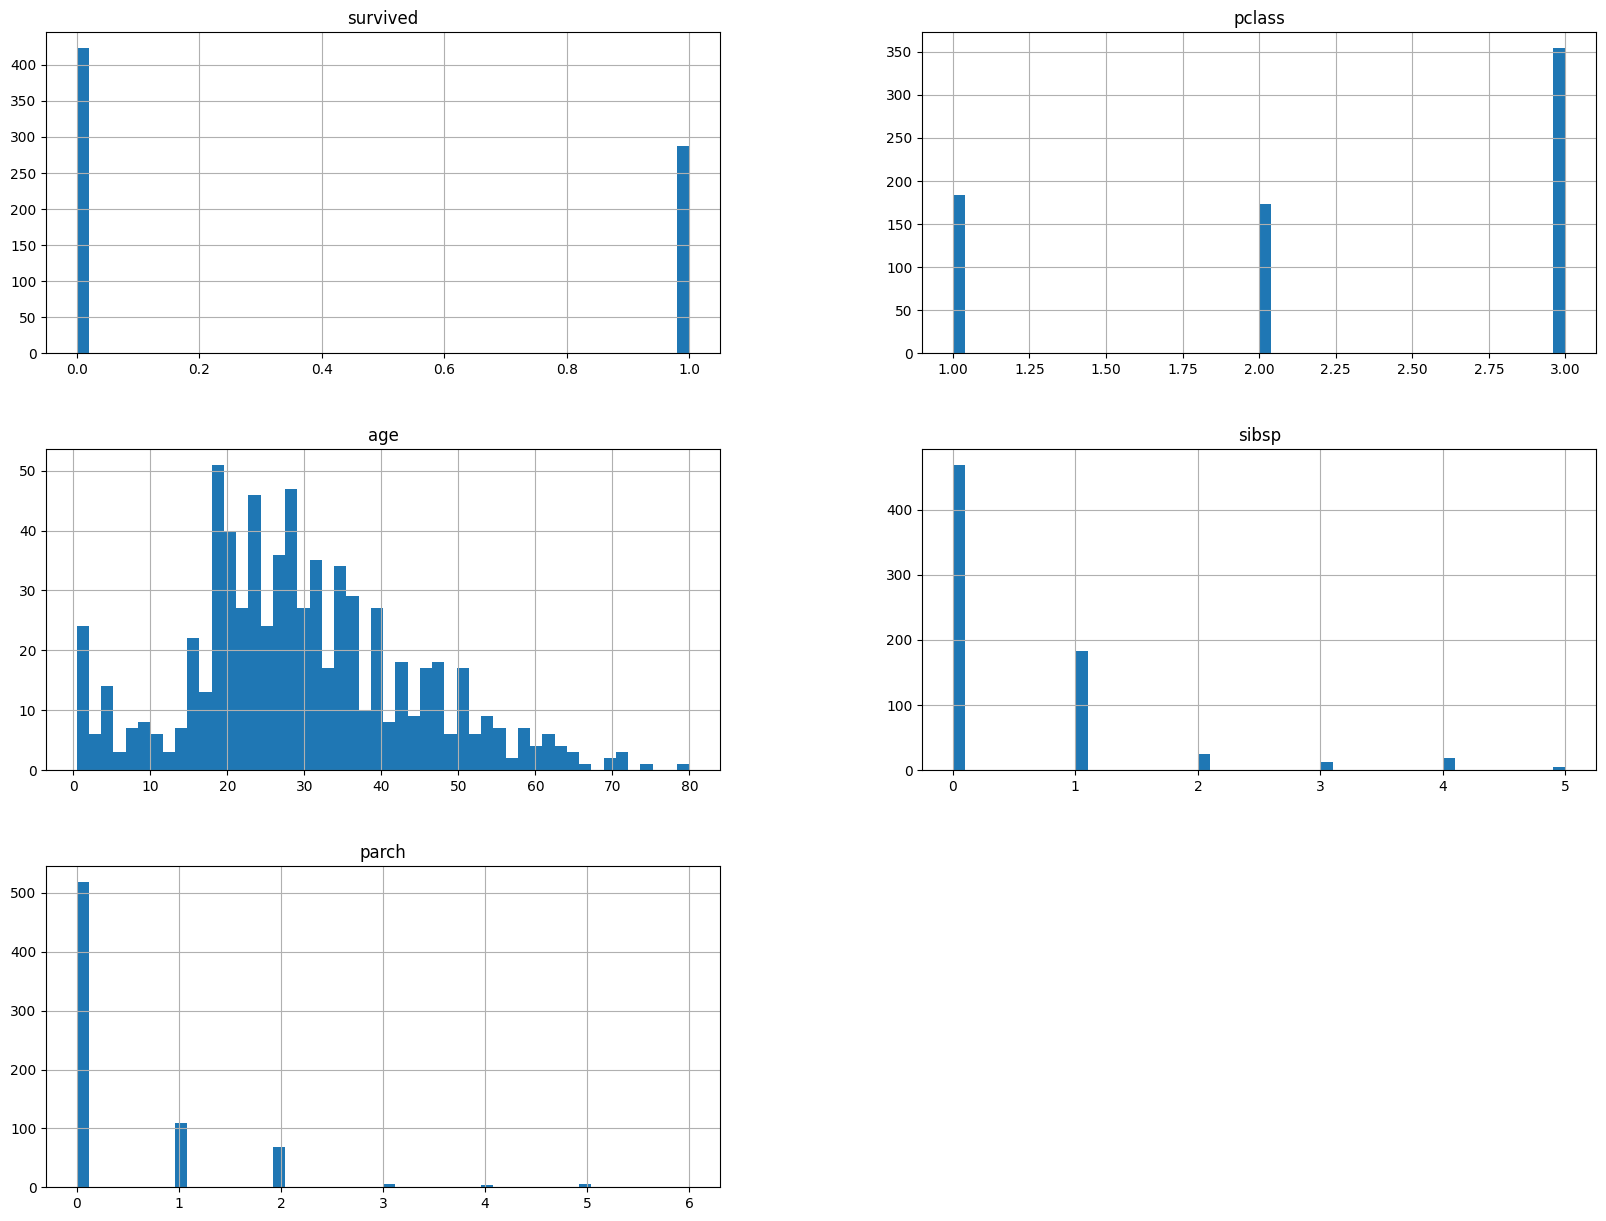

In [399]:
# Plot histograms of each column
data.hist(bins=50, figsize=(20,15)) 

In [400]:
# Replace the 0 and 1 values in the 'sex' column with 'Male' and 'Female'
data['sex'].replace({0: 'male', 1: 'female'}).value_counts()
data['sex'].value_counts()

sex
male      453
female    259
Name: count, dtype: int64

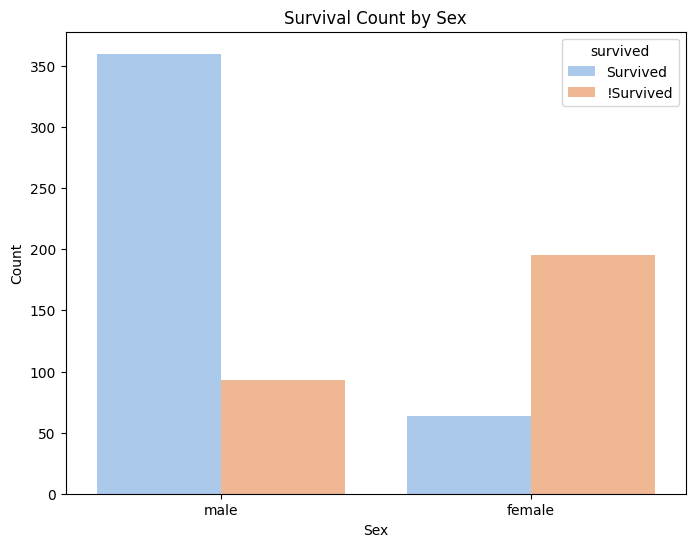

In [401]:
# Create a countplot for 'sex' and 'survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=data, palette='pastel')


# Set labels and title
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.xticks()
plt.ylabel('Count')
plt.legend(title="survived",labels=["Survived","!Survived"])

# Show the plot
plt.show()

In [402]:
data['embarked'].replace({0:'C', 1:'Q', 2:'S'}).value_counts()
data['embarked'].value_counts()

embarked
S    554
C    130
Q     28
Name: count, dtype: int64

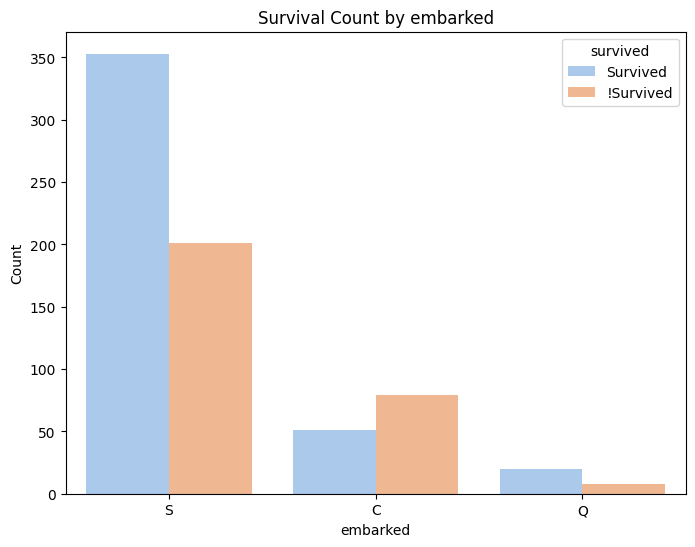

In [403]:
# Create a countplot for 'sex' and 'survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', hue='survived', data=data, palette='pastel')


# Set labels and title
plt.title('Survival Count by embarked')
plt.xlabel('embarked')
plt.xticks()
plt.ylabel('Count')
plt.legend(title="survived",labels=["Survived","!Survived"])

# Show the plot
plt.show()

## Cleaning Data

In [404]:
# Fill numeric columns with median values
data = data.fillna(data.median(numeric_only=True))

data = data.drop_duplicates() # Remove rows with duplicated values


## Encoding Categorical Variables

In [405]:
# Encoder les variables catégoriques
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].replace({'C': 0, 'Q': 1, 'S': 2})



C:\Users\pc\AppData\Local\Temp\ipykernel_12100\3503080433.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
C:\Users\pc\AppData\Local\Temp\ipykernel_12100\3503080433.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['embarked'] = data['embarked'].replace({'C': 0, 'Q': 1, 'S': 2})


## Splitting the Data

In [406]:
# turniung age into a categorical variable
data['age'] = pd.cut(data['age'], bins=[0,18,80], labels=[0, 1])
# data = data.drop(columns='age')
# Séparation des caractéristiques (X) et de la cible (y)
X = data.drop(columns='survived')  # Features
y = data['survived']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des jeux de données
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
X


Training set size: 432 samples
Test set size: 108 samples


,pclass,sex,age,sibsp,parch,embarked
0,3,0,1,1,0,2
1,1,1,1,1,0,0
2,3,1,1,0,0,2
3,1,1,1,1,0,2
4,3,0,1,0,0,2
...,...,...,...,...,...,...
880,2,1,1,0,1,2
885,3,1,1,0,5,1
887,1,1,1,0,0,2
889,1,0,1,0,0,0


## Chi-Square Test Functions

In [407]:
# Approximation de la fonction Gamma pour les calculs
def gamma(n):
    # Stirling's approximation for large n
    if n > 1:
        return np.sqrt(2 * np.pi * n) * (n / np.e) ** n
    else:
        return 1  # Gamma(1) = 1


- Gamma Function (Stirling’s Approximation):

    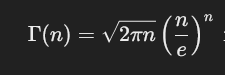

## the probability density function (PDF) for the Chi-squared distribution

In [408]:

def chi_square_pdf(chi2_stat, dof):
    if chi2_stat <= 0 or dof <= 0:
        return 0
    try:
        # Ensure stability by checking if the power calculation or exponential term goes out of bounds
        if chi2_stat > 1e10:  # Large chi-square statistic
            return 0
        term = (chi2_stat ** (dof / 2 - 1)) * np.exp(-chi2_stat / 2) / (2 ** (dof / 2) * gamma(dof / 2))
        if np.isnan(term) or np.isinf(term):
            return 0
        return term
    except Exception as e:
        print(f"Error in chi-square PDF calculation: {e}")
        return 0


- The formula for the PDF of the Chi-squared distribution with kk degrees of freedom (dof) is:

    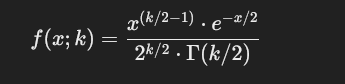

## calculates the Cumulative Distribution Function (CDF) of the Chi-squared distribution

In [409]:
def chi_square_cdf(chi2_stat, dof):
    # Calculate CDF by numerical integration using the trapezoid rule
    x_vals = np.linspace(0, chi2_stat, 1000)  # Use a fine range of values for numerical integration
    y_vals = np.array([chi_square_pdf(x, dof) for x in x_vals])
    
    # Use trapezoid method from scipy.integrate for more stable integration
    cdf_value = trapezoid(y_vals, x_vals)
    return cdf_value

- The CDF of the Chi-squared distribution is calculated by integrating the PDF. The approximation uses the trapezoid rule for numerical integration:

    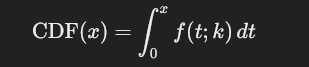

In [410]:
# Approximation de la fonction de distribution cumulative (CDF) du khi-deux pour calculer la p-value
def chi_square_p_value(chi2_stat, dof):
    return 1 - chi_square_cdf(chi2_stat, dof)


- The p-value is calculated from the Chi-squared statistic and its degrees of freedom (dof) using the CDF:

    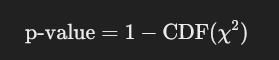

In [411]:
# Fonction pour calculer la statistique du khi-deux
def chi_square_test(observed):
    # Calculer les fréquences attendues
    expected = np.outer(observed.sum(axis=1), observed.sum(axis=0)) / observed.sum()
    
    # Calculer la statistique du khi-deux
    chi2_stat = np.sum((observed - expected) ** 2 / expected)
    
    # Calculer les degrés de liberté
    dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    
    # Calculer la p-value à partir de la statistique du khi-deux et des degrés de liberté
    p_value = chi_square_p_value(chi2_stat, dof)
    
    return chi2_stat, p_value


- Chi-squared Test Formula:
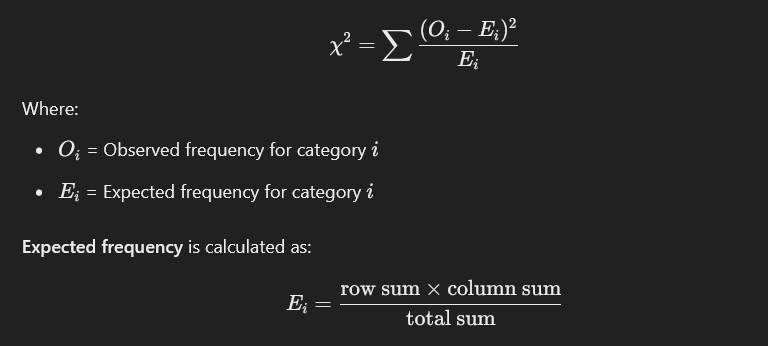



## Feature Evaluation

In [412]:
# Fonction pour tester chaque variable
def evaluate_feature(data, feature, target='survived'):
    observed = pd.crosstab(data[feature], data[target])
    chi2_stat, p_value = chi_square_test(observed.values)
    return chi2_stat, p_value


## Node Class for CHAID Tree

In [413]:
# Classe de nœud de l’arbre CHAID
class Node:
    def __init__(self, feature=None, category=None, children=None, value=None):
        self.feature = feature
        self.category = category
        self.children = children or {}
        self.value = value


## CHAID Tree Construction

In [414]:
# Fonction pour construire l'arbre CHAID
def build_chaid_tree(data, target='survived', depth=0, max_depth=3):
    # Stop criteria: single class or max depth reached
    if len(np.unique(data[target])) == 1 or depth == max_depth:
        value = data[target].mode().iloc[0]
        return Node(value=value)
        # Select the best feature for split
    best_feature = None
    best_chi2 = 0 # we don't need the chi2 value for now
    best_p_value = 1  # Initialize with a high p-value
    
    for feature in data.columns.drop(target):
        chi2_stat, p_value = evaluate_feature(data, feature, target)
        if p_value < best_p_value:
            best_p_value = p_value
            best_chi2 = chi2_stat
            best_feature = feature
    if best_feature is None:
        return Node(value=data[target].mode().iloc[0])
    
    node = Node(feature=best_feature)
    for category in data[best_feature].unique():
        subset = data[data[best_feature] == category]
        node.children[category] = build_chaid_tree(subset, target, depth + 1, max_depth)
    
    return node



- The __build_chaid_tree__ function is designed to construct a decision tree using the CHAID (__Chi-squared Automatic Interaction Detector__) algorithm. This algorithm builds a decision tree by recursively selecting the best feature to split the data based on the Chi-squared statistic. The split is determined by evaluating which feature has the strongest relationship with the target variable.

## Prediction Using the CHAID Tree

In [415]:
# Fonction pour prédire avec l'arbre CHAID
def predict(node, instance):
    if node.value is not None:
        return node.value
    feature_value = instance[node.feature]
    if feature_value in node.children:
        return predict(node.children[feature_value], instance)
    return None

def predict_tree(tree, data):
    return data.apply(lambda row: predict(tree, row), axis=1)


## Final Tree Visualization and Prediction Evaluation

In [416]:
def plot_chaid_tree(node, pos=(0.5, 1), level_width=12.5, vert_gap=1, ax=None, parent_pos=None, category_label=None, depth=0):
    """
    Recursively plot a CHAID decision tree from a custom Node structure with increased spacing between groups of leaf nodes.

    Args:
        node (Node): The current node of the tree.
        pos (tuple): Position of the current node (x, y).
        level_width (float): Horizontal spacing between nodes, adjusted for each group of leaves.
        vert_gap (float): Vertical spacing between levels.
        ax (matplotlib axis): The axis to plot on.
        parent_pos (tuple): Position of the parent node (for connecting lines).
        category_label (str): Label for the branch from parent to this node.
        depth (int): Depth of the current node in the tree.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(26, 20))
        ax.set_aspect(1.0)
        ax.axis('off')
    
    # Display leaf node value with label "Survived" or "Not Survived"
    if node.value is not None:
        label = "Survived" if node.value == 1 else "Not Survived"
        ax.text(pos[0], pos[1], label, ha='center', va='center', 
                bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
    else:
        # Internal node: show the feature name
        ax.text(pos[0], pos[1], f"Feature: {node.feature}", ha='center', va='center', 
                bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round,pad=0.5'))

    # Draw a line from the parent node to the current node if not root
    if parent_pos:
        ax.plot([parent_pos[0], pos[0]], [parent_pos[1], pos[1]], 'k-')
        # Label the category on the branch
        if category_label is not None:
            ax.text((parent_pos[0] + pos[0]) / 2, (parent_pos[1] + pos[1]) / 2, 
                    category_label, ha='center', va='center', color='red')

    # Function to calculate total number of leaf nodes in a subtree
    def count_leaf_nodes(node):
        if node.value is not None:
            return 1
        return sum(count_leaf_nodes(child) for child in node.children.values())

    # Recursively plot each child node with spacing adjustments for leaf groups
    if node.children:
        total_leaves = sum(count_leaf_nodes(child) for child in node.children.values())
        cumulative_offset = -level_width / 2  # Start on the left side of the current position

        for category, child_node in node.children.items():
            # Calculate the horizontal span for this child node group
            group_leaves = count_leaf_nodes(child_node)
            group_width = (group_leaves / total_leaves) * level_width
            
            # Center the group within its calculated width
            dx = cumulative_offset + group_width / 2
            dy = -vert_gap
            child_pos = (pos[0] + dx, pos[1] + dy)
            
            # Recursive call to plot the child node, increasing depth
            plot_chaid_tree(child_node, pos=child_pos, level_width=group_width, 
                            vert_gap=vert_gap, ax=ax, parent_pos=pos, category_label=category, depth=depth + 1)
            
            # Update the cumulative offset by the width of this group
            cumulative_offset += group_width



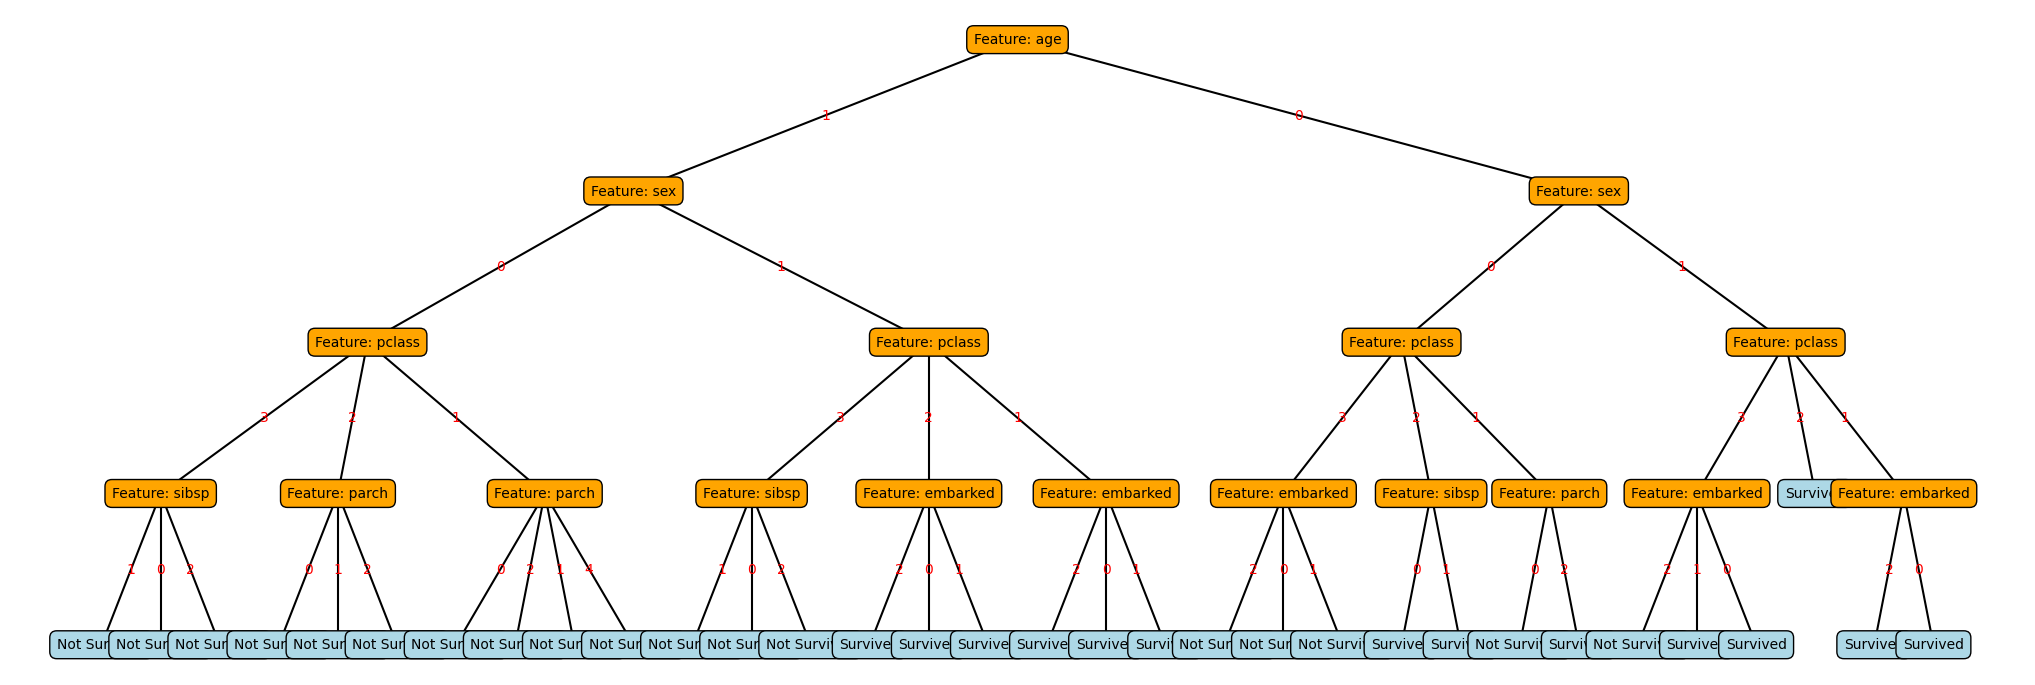

In [417]:
chaid_tree = build_chaid_tree(pd.concat([X_train,y_train],axis=1), target='survived', max_depth=4) # Build the CHAID tree

# Visualize the CHAID tree
plot_chaid_tree(chaid_tree)
plt.show()


In [418]:
# Evaluation des performances
predictions = predict_tree(chaid_tree, X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 79.63%


In [419]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix
unique_values = y_test.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_values)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

## New Exemple Prediction

In [ ]:
# Nouveau cas pour la prédiction
new_instance = pd.DataFrame({
    'age': [38],  # Numeric value
    'sex': ['female'],  # Categorical feature, to be encoded
    'pclass': [1],  # Categorical feature, using 3 as an example
    'sibsp': [0],  # Need to include this column as well
    'parch': [0],  # Include 'parch' column, even if it's not used in the decision tree
    'embarked': ['S'],  # Categorical feature, to be encoded
})

# Preprocess the new instance similarly to the training data
new_instance['sex'] = new_instance['sex'].map({'male': 0, 'female': 1})  # Encoding gender
new_instance['embarked'] = new_instance['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encoding embarked

# Prediction function (assuming `predict_tree` function is defined)
y_pred = predict_tree(chaid_tree, new_instance)

# Map 0 to 'Not Survived' and 1 to 'Survived'
y_pred_label = y_pred.map({0: 'Not Survived', 1: 'Survived'})

# Display the result
print("Prediction for new instance:", y_pred_label.iloc[0])


Prediction for new instance: nan
